# OpenPack Dataset - Getting Started !!

This notebook shows how to download OpenPack dataset and file formats.
We are developping python package named [`openpack-tooklit` (link)](https://github.com/open-pack/openpack-toolkit) to accelerate the usability of this dataset.
I hope you can understand the dataset overview and get familiar with our data and tools through this tutorial.

## Table of Contents
1. Donwload Dataset
1. Visualize the OpenPack Dataset
    1. Annotation Data (`openpack-operatsion`)
    1. IMU Data (`atr-qags`)
    1. Keypoints (`kinect-2d-kpt`)


## Note 
In this tutorial we to use `./data/datasets` as a dataset directory. Please change this path to fit your envirinment.

## [1] Donwload OpenPack Dataset

You can use download the OpenPack dataset from [zenodo](https://doi.org/10.5281/zenodo.5909086), online repository for Open Science.
Data is split into some subdirectory (subjects and sensor stream) and zipped files is available in zenodo. So you can donwload, unzip and integrate them one by one. 
Here, we will show more easy way to download and setup directry using `openpack-toolkit (optk)`.
First install `openpack-tooklit` via pip and download dataset. 

### 1-1: Install `openpack-tooklit (optk)` via PyPI

In [1]:
! pip install openpack-toolkit

In [2]:
import openpack_toolkit as optk
print("version", optk.__version__)

version 0.4.0


### 1-2: Download OpenPack Dataset

`optk-download` is a shell command installed along with `openpack-tooklit`. 
You need to set 3 parameters to used this command.

- `-d` (dataset dir): a directory to store the OpenPack dataset. In this tutorial, we use `./data/datasets`. This directory will not be made automatically. Please makse sure whether this directory exisits in advance.
- `-v` (version): a dataset version indicator. Here we use `v0.2.0` (latest version at 2022-07-05).
- `-s` (streams): a lsit of data stream specifiers. Please list up data stream key listed [here (sensor data)](https://github.com/open-pack/openpack-toolkit/blob/main/docs/DATA_STREAM.md) and [here (annotatations)](https://github.com/open-pack/openpack-toolkit/blob/main/docs/ANNOTATION.md) with comma separeted format.

In [3]:
# Usage of `optk-download` command
! optk-download -h

usage: optk-download [-h] -d DATASET_DIR [-v VERSION] [-s STREAMS]

optional arguments:
  -h, --help            show this help message and exit
  -d DATASET_DIR, --dataset-dir DATASET_DIR
                        Path to dataset directory. Downloaded data will be
                        stored under the directory.
  -v VERSION, --version VERSION
                        Target dataset version. Default: v0.2.0
  -s STREAMS, --streams STREAMS
                        A list of data stream names that you want to download.
                        Stream names must be separated by commas. Defaul: atr-
                        qags,openpack-operations


In [4]:
# make dataset directory
! mkdir -p ./data/datasets

In [5]:
DATASET_ROOTDIR = "./data/datasets"
OPENPACK_VERSION = "v0.2.0"
STREAMS = ["openpack-operations", "atr-qags",  "kinect-2d-kpt"]

STREAMS_STR = ",".join(STREAMS)
! optk-download -d $DATASET_ROOTDIR -v v0.2.0 -s $STREAMS_STR 

INFO:openpack_toolkit.bin.download:Donwload OpenPack dataset from zenodo.
INFO:openpack_toolkit.bin.download: - dataset_dir : data/datasets
INFO:openpack_toolkit.bin.download: - version     : v0.2.0
INFO:openpack_toolkit.bin.download: - streams     : ['openpack-operations', 'atr-qags', 'kinect-2d-kpt']
INFO:openpack_toolkit.download._helpers:== [0/3] atr-qags ==
INFO:openpack_toolkit.download._helpers:[0/4] U0102
INFO:openpack_toolkit.download._helpers:[1/4] U0103
INFO:openpack_toolkit.download._helpers:[2/4] U0105
INFO:openpack_toolkit.download._helpers:[3/4] U0106
INFO:openpack_toolkit.download._helpers:== [1/3] kinect-2d-kpt ==
INFO:openpack_toolkit.download._helpers:[0/4] U0102
INFO:openpack_toolkit.download._helpers:[1/4] U0103
INFO:openpack_toolkit.download._helpers:[2/4] U0105
INFO:openpack_toolkit.download._helpers:[3/4] U0106
INFO:openpack_toolkit.download._helpers:== [2/3] openpack-operations ==
INFO:openpack_toolkit.download._helpers:[0/4] U0102
INFO:openpack_toolkit.downloa

When you finish downloading the dataset, the dataset directory will be like this.

In [6]:
! tree ./data/datasets

./data/datasets
└── openpack
    └── v0.2.0
        ├── U0102
        │   ├── annotation
        │   │   └── openpack-operations
        │   │       ├── S0100.csv
        │   │       ├── S0200.csv
        │   │       ├── S0300.csv
        │   │       ├── S0400.csv
        │   │       └── S0500.csv
        │   ├── atr
        │   │   ├── atr01
        │   │   │   ├── S0100.csv
        │   │   │   ├── S0200.csv
        │   │   │   ├── S0300.csv
        │   │   │   ├── S0400.csv
        │   │   │   └── S0500.csv
        │   │   ├── atr02
        │   │   │   ├── S0100.csv
        │   │   │   ├── S0200.csv
        │   │   │   ├── S0300.csv
        │   │   │   ├── S0400.csv
        │   │   │   └── S0500.csv
        │   │   ├── atr03
        │   │   │   ├── S0100.csv
        │   │   │   ├── S0200.csv
        │   │   │   ├── S0300.csv
        │   │   │   ├── S0400.csv
        │   │   │   └── S0500.csv
        │   │   └── atr04
        │   │       ├── S0100.csv
        │   │       ├── S0200.csv

## [2] Load and Visualize Data in OpenPack Dataset

In OpenPack dataset, all configurations including file loacations are managed by [`omegaconf` (link)](https://omegaconf.readthedocs.io/en/latest/), a YAML based hierarchical configuration system. 
And `openpack-toolkit` provides python's dataclass instancees (defined in [here](https://github.com/open-pack/openpack-toolkit/tree/main/openpack_toolkit/configs)) and you can used them to get the file location.


Config YAML files are stored [here](https://github.com/open-pack/openpack-toolkit/tree/main/configs).
You can get detailed information by reading these config files.


To get desired variable using the config object, `openpack-toolkit` ustilze OmegaConf's variable interpolation feature.
We recommend you to read [this document (official docs of omegaconf)](https://omegaconf.readthedocs.io/en/latest/usage.html#variable-interpolation) to deepen your understanding.

In [7]:
from pathlib import Path

import numpy as np
import pandas as pd
import json
from omegaconf import DictConfig, OmegaConf, open_dict
from openpack_toolkit.utils.notebook import noglobal

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec, GridSpecFromSubplotSpec
import seaborn as sns
sns.set("notebook", "whitegrid", font_scale=1.5)

The root config object is defined like this.

In [8]:
cfg = OmegaConf.create({
    "user": optk.configs.users.U0102,
    "session": None,
    "path": {
        "openpack": {
            "version": OPENPACK_VERSION,
            "rootdir": DATASET_ROOTDIR + "/openpack/${.version}",
        },
    },
    "dataset": {
        "annotation": None,
        "stream": None,
    }
})

In [9]:
print(OmegaConf.to_yaml(cfg))

user:
  id: 102
  name: U0102
  sessions:
    S0100:
      duration: 50m13s
      end: '2021-10-22T12:10:07+09:00'
      start: '2021-10-22T11:19:54+09:00'
    S0200:
      duration: 39m08s
      end: '2021-10-22T13:10:22+09:00'
      start: '2021-10-22T12:31:14+09:00'
    S0300:
      duration: 36m44s
      end: '2021-10-22T14:51:28+09:00'
      start: '2021-10-22T14:14:44+09:00'
    S0400:
      duration: 33m18s
      end: '2021-10-22T15:41:36+09:00'
      start: '2021-10-22T15:08:18+09:00'
    S0500:
      duration: 30m22s
      end: '2021-10-22T16:26:48+09:00'
      start: '2021-10-22T15:56:26+09:00'
session: null
path:
  openpack:
    version: v0.2.0
    rootdir: ./data/datasets/openpack/${.version}
dataset:
  annotation: null
  stream: null



## 2-A: Annotation Data (openpack-operations)

- [docs](https://github.com/open-pack/openpack-toolkit/blob/main/docs/ANNOTATION.md#1-openpack_operations)
- [config](https://github.com/open-pack/openpack-toolkit/blob/main/configs/dataset/annotation/openpack-operations.yaml)

The definision of activity classes and the file formats are described [here](https://github.com/open-pack/openpack-toolkit/blob/main/docs/ANNOTATION.md).
In this section, let's explor the activity set named `OPENPACK_OPERATIONS` (key = `openpack-operations`).
This activity set is consist of 10 work operations and data is saved in CSV format. 
In the OpenPack challenge, a task for participants is to localize these activities.

First, get path to the annotation data of U0102-S0100 using omegconf.
A path to the annotation data is defined in `OPENPACK_OPERATIONS_ANNOTATION.path`.
As you can see, values in the config contain placeholders and they will be interpolated when you access to these attributes.
So you need to set required variables (`session`, etc) first and access to it to get the disired path.

In [10]:
# NOTE: Path template is defined in `path` attribute.
print(OmegaConf.to_yaml(optk.configs.datasets.annotations.OPENPACK_OPERATIONS_ANNOTATION))

name: openpack-operations
version: v3.0.0
path:
  dir: ${path.openpack.rootdir}/${user.name}/annotation/${..name}
  fname: ${session}.csv
file_format: null
classes:
  classes:
  - id: 100
    name: Picking
    is_ignore: false
  - id: 200
    name: RelocateItemLabel
    is_ignore: false
  - id: 300
    name: AssembleBox
    is_ignore: false
  - id: 400
    name: InsertItems
    is_ignore: false
  - id: 500
    name: CloseBox
    is_ignore: false
  - id: 600
    name: AttachBoxLabel
    is_ignore: false
  - id: 700
    name: ScanLabel
    is_ignore: false
  - id: 800
    name: AttachShippingLabel
    is_ignore: false
  - id: 900
    name: PutOnRack
    is_ignore: false
  - id: 1000
    name: Fill-outOrder
    is_ignore: false
  - id: 8100
    name: 'Null'
    is_ignore: true



In [11]:
# Set parameters to the config object.
# NOTE: user.name is already defined above.
cfg.dataset.annotation = optk.configs.datasets.annotations.OPENPACK_OPERATIONS_ANNOTATION
cfg.session = "S0100"

path = Path(
    cfg.dataset.annotation.path.dir, 
    cfg.dataset.annotation.path.fname,     
)
print(path)

data/datasets/openpack/v0.2.0/U0102/annotation/openpack-operations/S0100.csv


In [12]:
# Load CSV file
df = pd.read_csv(path)

In [13]:
df

,unixtime,user,session,box,operation
0,1634869194000,102,100,1,100
1,1634869195000,102,100,1,100
2,1634869196000,102,100,1,100
3,1634869197000,102,100,1,100
4,1634869198000,102,100,1,100
...,...,...,...,...,...
3007,1634872201000,102,100,20,1000
3008,1634872202000,102,100,20,1000
3009,1634872203000,102,100,20,1000
3010,1634872204000,102,100,20,1000


The DataFrame contains unixtime and operation class IDs and so on.
`unixtime` is important in the OpenPack dataset. When you want to use multiple data streams, you can `unixtime` to align sequences.

Next, visualize loaded anntation data.

In [14]:
@noglobal()
def plot_openpack_operations(df: pd.DataFrame, xlim=None, figsize=(30, 7), OPENPACK_OPERATIONS=optk.OPENPACK_OPERATIONS):
    seq_len = len(df)
    
    df["cls_idx"] = optk.OPENPACK_OPERATIONS.convert_id_to_index(df["operation"])

    df_head = df.drop_duplicates(["user", "session", "box"], keep="first")
    df_tail = df.drop_duplicates(["user", "session", "box"], keep="last")
    df_box = pd.DataFrame({
        "box": df_head["box"],
        "start": df_head.index,
        "end": df_tail.index,
    }).reset_index(drop=True)

    # == Plot ==
    fig, ax0 = plt.subplots(1, 1, figsize=figsize)
    xloc = np.arange(seq_len)

    ax0.plot(xloc, df["cls_idx"], lw=3)
    for index, row in df_box.iterrows():
        ax0.fill_between([row.start, row.end], 0, 11, color=f"C{row.box%10}", alpha=0.2)
        ax0.text(
            row.start, 11, f"Box{row.box:0=2}",
            fontweight="bold", color="black",
        )

    xticks = np.arange(0, seq_len, 60 * 2)
    xticks_minor = np.arange(0, seq_len, 30)
    ax0.set_xticks(xticks)
    ax0.set_xticklabels(xticks // 60)
    ax0.set_xticks(xticks_minor, minor=True)
    ax0.set_xlabel("Time [min]", fontweight="bold")
    if xlim is None:
        ax0.set_xlim([0, seq_len])
    else:
        ax0.set_xlim(xlim)

    yticklabels = [k for k in OPENPACK_OPERATIONS.get_ids()]
    ax0.set_yticks(np.arange(len(OPENPACK_OPERATIONS)))
    ax0.set_yticklabels(yticklabels)
    ax0.set_ylabel("Class ID")

    ax0.grid(True, which="minor", linestyle=":")

    ax0.set_title(f"OPENPACK OPERATIONS", fontsize="x-large", fontweight="bold")

    fig.tight_layout()
    return fig

/var/folders/tr/spf08x_546q6lf70f6rjp4n80000gn/T/ipykernel_9009/766223975.py:2: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


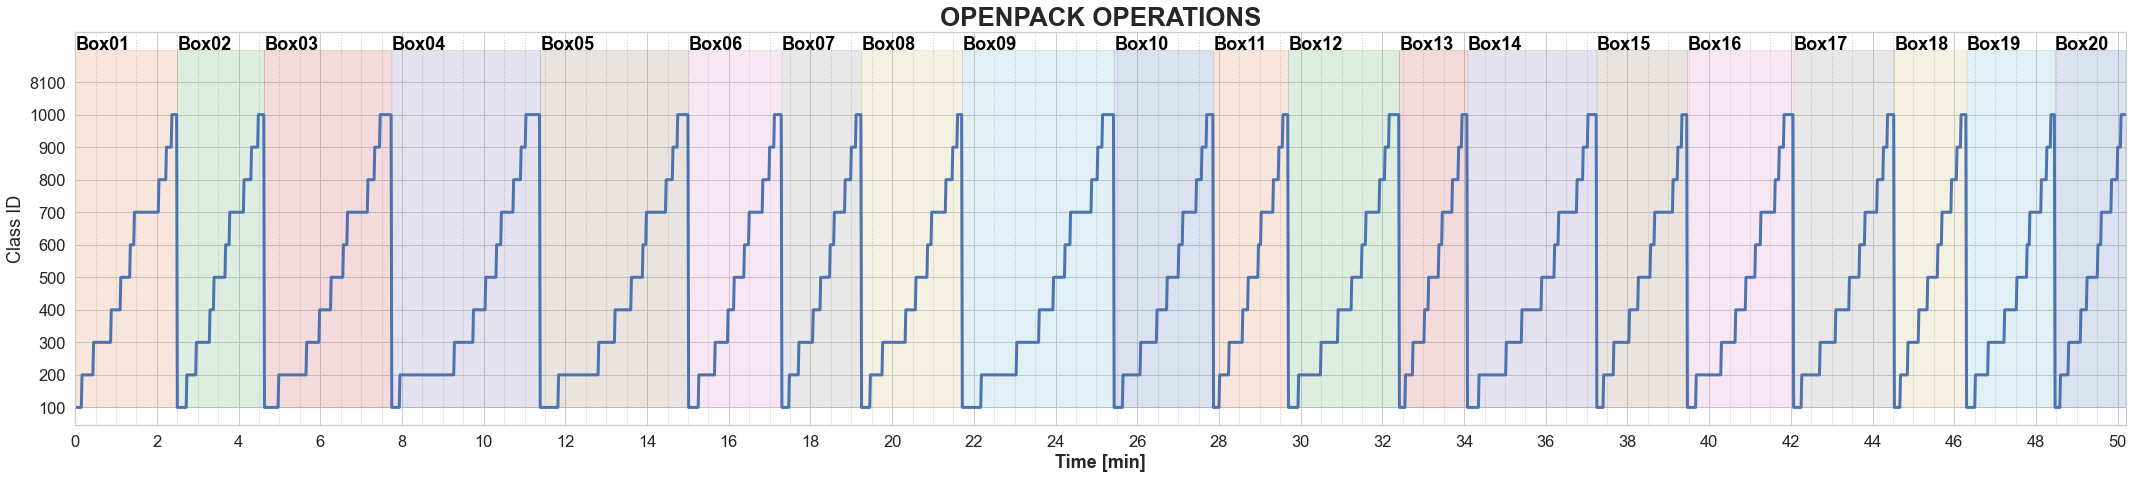

In [15]:
fig = plot_openpack_operations(df)
fig.show()

### Tips: Resample Label Sequence

The sampling rate of operation labels is 1 Hz, but sensor data stream has different sampling rate.
You can get label sequence in the desired sampling interval with [`optk.data.load_and_resample_operation_labels()` (API Docs)](https://open-pack.github.io/openpack-toolkit/openpack_toolkit/data/index.html#openpack_toolkit.data.load_and_resample_operation_labels). This function returns activity IDs and indexes at the given timestamps (unixtime). 


In [16]:
""" Examples from https://github.com/open-pack/openpack-toolkit/blob/f12cd1e9b1c497d7f10558bf8149a04cd71cc781/tests/data/test_dataloader.py
"""
cfg.session = "S0500"
path = Path(
    cfg.dataset.annotation.path.dir,
    cfg.dataset.annotation.path.fname,
)
print(f"input path: {path} (exists={path.exists()})")

unixtimes = np.array([
    1634885794000,
    1634885794200,  # Resampling 1
    1634885794400,  # Resampling 2
    1634885794600,  # Resampling 3
    1634885794800,  # Resampling 4
    1634885795000,
    1634885796000,
    1634885798000,  # Next Action
])


df_annot = optk.data.load_and_resample_operation_labels(path, unixtimes, classes=optk.OPENPACK_OPERATIONS)

input path: data/datasets/openpack/v0.2.0/U0102/annotation/openpack-operations/S0500.csv (exists=True)


In [17]:
df_annot

,unixtime,annot_time,user,session,box,act_id,act_idx
0,1634885794000,1634885794000,102,500,1,100,0
1,1634885794200,1634885794000,102,500,1,100,0
2,1634885794400,1634885794000,102,500,1,100,0
3,1634885794600,1634885794000,102,500,1,100,0
4,1634885794800,1634885794000,102,500,1,100,0
5,1634885795000,1634885795000,102,500,1,100,0
6,1634885796000,1634885796000,102,500,1,200,1
7,1634885798000,1634885798000,102,500,1,200,1


## 2-B: Acceratation, Gyroscope, and Quaterinon from IMU (`atr-qags`)

- [Docs](https://github.com/open-pack/openpack-toolkit/blob/main/docs/DATA_STREAM.md#1-atr-qags)

Subjects were attach 4 IMU sensors ([ATR-TSND151](http://www.atr-p.com/products/TSND121_151.html)). 
These sensors recorded acceratation, gyroscope, and quaterinon sequences. You can use these to predict work operations in the challenge.
The data is saved as CSV file.

Let's load and visualize data from atr01 (IMU sensor attached to the right wrist). The procedure is almoset same as that of described above.

In [18]:
# NOTE: Path template is defined in `path` attribute.
print(OmegaConf.to_yaml(optk.configs.datasets.streams.ATR_QAGS_STREAM))

schema: ImuConfig
name: atr-qags
description: Acceleration, gyro, and quaternion data captured by ATR IMU sensors.
super_stream: None
path:
  dir: ${path.openpack.rootdir}/${user.name}/atr/${device}
  fname: ${session}.csv
file_format: null
frame_rate: 30
devices:
- atr01
- atr02
- atr03
- atr04
acc: true
gyro: true
quat: true



In [19]:
# Set parameters to the config object.
cfg.dataset.stream = optk.configs.datasets.streams.ATR_QAGS_STREAM
cfg.session = "S0100"
cfg.device = "atr01"

path = Path(
    cfg.dataset.stream.path.dir, 
    cfg.dataset.stream.path.fname,     
)
print(path)

data/datasets/openpack/v0.2.0/U0102/atr/atr01/S0100.csv


In [20]:
# Load CSV file
df = pd.read_csv(path)

In [21]:
df

,unixtime,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,quat_w,quat_x,quat_y,quat_z
0,1634869193027,0.0548,0.9462,0.3235,1.19,3.22,3.29,0.0,0.0,0.0,0.0
1,1634869193060,0.0689,0.9371,0.3079,1.50,-17.96,3.71,0.0,0.0,0.0,0.0
2,1634869193093,0.1195,0.9435,0.2842,2.32,-24.72,5.70,0.0,0.0,0.0,0.0
3,1634869193126,0.1561,0.9445,0.2835,2.52,-25.43,7.42,0.0,0.0,0.0,0.0
4,1634869193159,0.1803,0.9330,0.2769,2.87,-18.66,7.82,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
91358,1634872207841,0.8516,0.5868,0.4795,79.27,60.17,-10.52,0.0,0.0,0.0,0.0
91359,1634872207874,0.7725,0.5795,0.3990,63.07,65.45,-3.70,0.0,0.0,0.0,0.0
91360,1634872207907,0.7454,0.6195,0.4908,42.26,60.21,5.59,0.0,0.0,0.0,0.0
91361,1634872207940,0.7005,0.5997,0.4773,15.93,51.97,6.06,0.0,0.0,0.0,0.0


In [22]:
@noglobal()
def plot_atr_qags(df: pd.DataFrame, cfg: DictConfig):
    seq_len = len(df)
    
    
    fig = plt.figure(figsize=(30, 2.5 * 4))
    gs_master = GridSpec(nrows=2, ncols=1, height_ratios=[3, 1])
    gs_line = GridSpecFromSubplotSpec(
        nrows=3, ncols=1, subplot_spec=gs_master[0], hspace=0.05)
    gs_hist = GridSpecFromSubplotSpec(nrows=1, ncols=3, subplot_spec=gs_master[1])

    data = [
        {
            "label": "Acc [G]",
            "cols": ["acc_x", "acc_y", "acc_z"],
            "lim": [-4.0, 4.0],
        },
        {
            "label": "Gyro [dps]",
            "cols": ["gyro_x", "gyro_y", "gyro_z"],
            "lim": [-500.0, 500.0],
        },
        {
            "label": "Quaternion",
            "cols": ["quat_w", "quat_x", "quat_y", "quat_z"],
            "lim": [-1.5, 1.5],
        },
    ]
    xloc = df.index.values
    for i, d in enumerate(data):
        cols = d["cols"]
        ylabel = d["label"]
        lim = d["lim"]

        X = df[cols].values.T

        # -- Sequence (Acc / Gyro / Quat) --
        ax0 = fig.add_subplot(gs_line[i])
        for ch, col_name in enumerate(cols):
            ax0.plot(xloc, X[ch], label=col_name, color=f"C{ch}", alpha=0.75)

        xticks = np.arange(0, seq_len + 1, 30 * 60 * 2)
        xticks_minor = np.arange(0, seq_len + 1, 30 * 30)
        ax0.set_xticks(xticks)
        ax0.set_xticklabels(xticks // (30 * 60))
        ax0.set_xticks(xticks_minor, minor=True)
        ax0.set_xlim([0, seq_len])

        ax0.set_ylabel(ylabel, fontweight="bold")

        ax0.grid(True, which="minor", linestyle=":")
        ax0.legend(loc="upper right")

        if i == 2:
            ax0.set_xlabel("Time [min]", fontweight="bold")
        else:
            ax0.tick_params(
                labelbottom=False
            )

        # -- Histgram --
        ax1 = fig.add_subplot(gs_hist[i])
        for ch, col_name in enumerate(cols):
            ax1.hist(
                X[ch],
                range=lim,
                bins=50,
                label=col_name,
                color=f"C{ch}",
                alpha=0.50)

        ax1.set_xlabel(ylabel, fontweight="bold")
        ax1.set_ylabel("Freq", fontweight="bold")
        ax1.legend(loc="upper right")

    fig.suptitle(
        f"IMU - {cfg.device} | {cfg.user.name}-{cfg.session}",
        fontsize="x-large",
        fontweight="black")
    fig.tight_layout()
    return fig


/var/folders/tr/spf08x_546q6lf70f6rjp4n80000gn/T/ipykernel_9009/2496980730.py:2: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


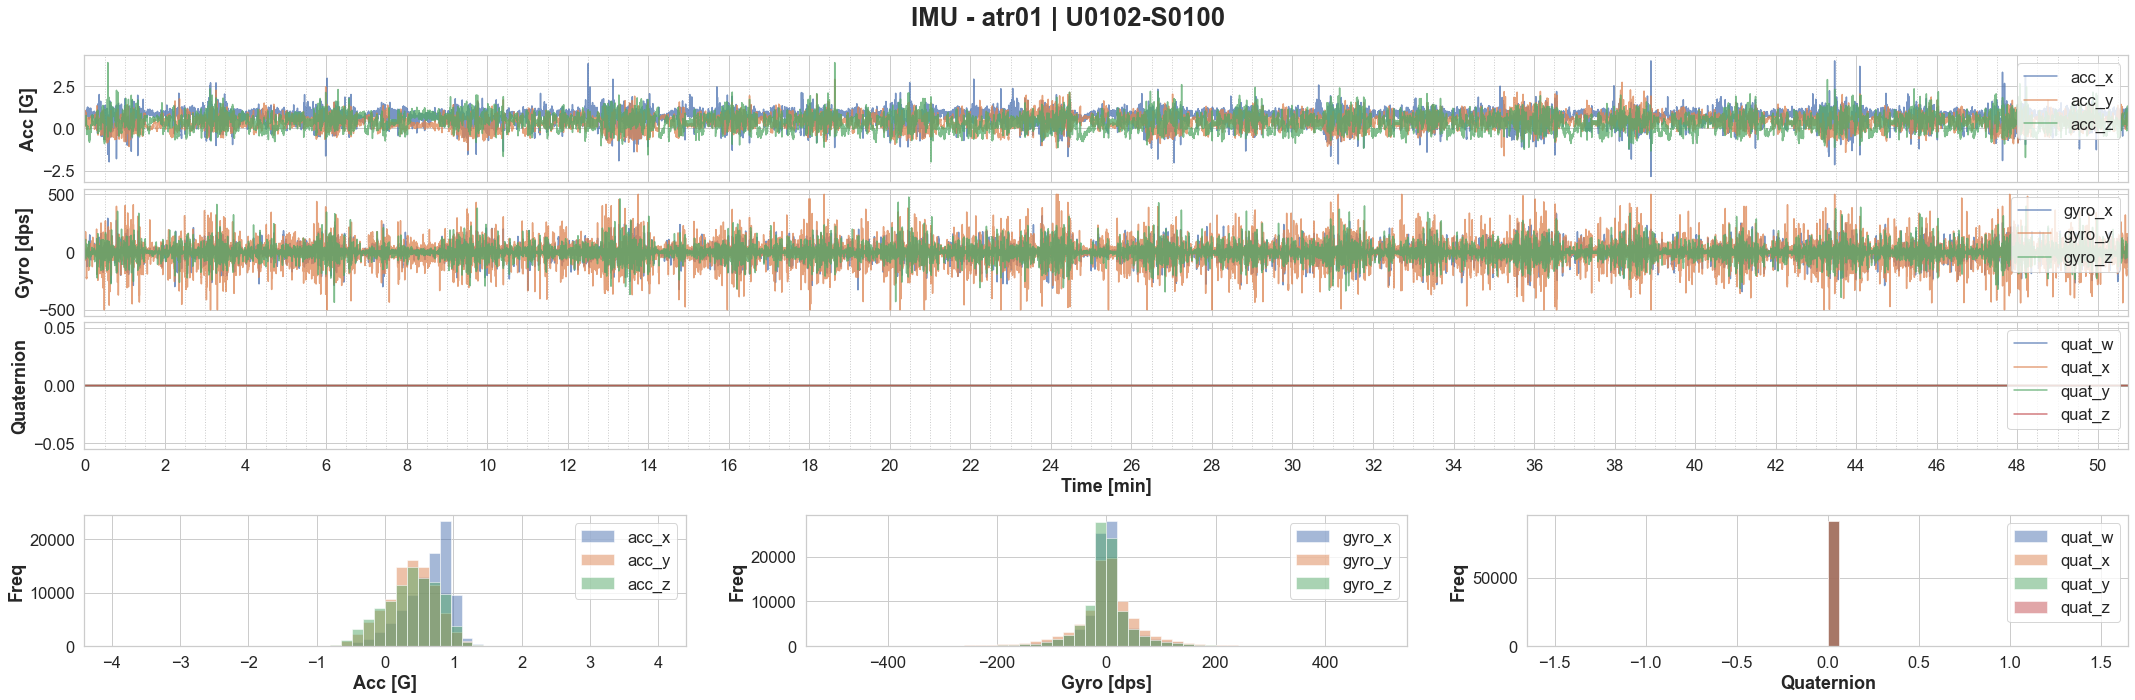

In [23]:
fig = plot_atr_qags(df, cfg)
fig.show()

**NOTE: Quaterion data is missing for some subjects. Please check before use them.**

### Tips: Load multiple IMU sequences at Once

You can use `optk.data.load_imu()` to load IMU data from multiple devices, e.g., left and right wrist.
This function retuns sequences after time alignment.

In [24]:
# Make path list
paths = []
devices = ["atr01", "atr02"]

for device in devices:
    cfg.device = device
    paths.append(
        Path(
            cfg.dataset.stream.path.dir,
            cfg.dataset.stream.path.fname,
        )
    )

display(paths)

[PosixPath('data/datasets/openpack/v0.2.0/U0102/atr/atr01/S0100.csv'),
 PosixPath('data/datasets/openpack/v0.2.0/U0102/atr/atr02/S0100.csv')]

In [25]:
# Get only ACC data.
T, X = optk.data.load_imu(paths, use_acc=True, use_gyro=False, use_quat=False)
print(f"X={X.shape}, T={T.shape}")

X=(6, 91363), T=(91363,)


X's first dim = `["acc_x@atr01", "acc_y @atr01", "acc_x@atr01", "acc_x@atr02", "acc_y @atr02", "acc_x@atr02"] `

## 2-C: Keypoints (`kinect-2d-kpt`)

- [Docs](https://github.com/open-pack/openpack-toolkit/blob/main/docs/DATA_STREAM.md#2-kinect-2d-kpt)

2D keypoints are extracted from kinect recordings (front-view) using [open-mmlab/mmpose](https://github.com/open-mmlab/mmpose).
Keypoints data is provided in a MS COCO JSON file.

In [26]:
# NOTE: Path template is defined in `path` attribute.
print(OmegaConf.to_yaml(optk.configs.datasets.streams.KINECT_2D_KPT_STREAM))

schema: KeypointConfig
name: kinect-2d-kpt
description: 2D keypoint extracted by mmpose/hrnet. The model used to extract keypoints
  was 2-stage bottom-up model defined in [mmpose/2d_kpt_sview_rgb_vid/posewarper/posetrack18/hrnet_w48_posetrack18_384x288_posewarper_stage2.py](https://github.com/open-mmlab/mmpose/blob/master/configs/body/2d_kpt_sview_rgb_vid/posewarper/posetrack18/hrnet_w48_posetrack18_384x288_posewarper_stage2.py).
super_stream: None
path:
  dir: ${path.openpack.rootdir}/${user.name}/kinect/${..category}/${..model}/single
  fname: ${session}.json
file_format: null
frame_rate: 15
category: 2d-kpt
model: mmpose-hrnet-w48-posetrack18-384x288-posewarper-stage2
nodes:
  0: nose
  1: left_eye
  2: right_eye
  3: left_ear
  4: right_ear
  5: left_shoulder
  6: right_shoulder
  7: left_elbow
  8: right_elbow
  9: left_wrist
  10: right_wrist
  11: left_hip
  12: right_hip
  13: left_knee
  14: right_knee
  15: left_ankle
  16: right_ankle



In [27]:
# Set parameters to the config object.
cfg.dataset.stream = optk.configs.datasets.streams.KINECT_2D_KPT_STREAM
cfg.session = "S0100"

path = Path(
    cfg.dataset.stream.path.dir, 
    cfg.dataset.stream.path.fname,     
)
print(path)

data/datasets/openpack/v0.2.0/U0102/kinect/2d-kpt/mmpose-hrnet-w48-posetrack18-384x288-posewarper-stage2/single/S0100.json


In [28]:
# Load JSON file
with open(path, "r") as f:
    data = json.load(f)

In [29]:
data.keys()

dict_keys(['info', 'licenses', 'annotations', 'categories'])

In [30]:
data["info"]

{'year': 2022,
 'version': 'v0.2.0',
 'description': 'openpack/U0102/2d_kpt/mmpose-hrnet-w48-posetrack18-384x288-posewarper-stage2/single/S0100',
 'contributor': 'Naoya Yoshimura, Jaime Morales, Takuya Maekawa',
 'url': 'https://open-pack.github.io',
 'date_created': '2022/03/31'}

In [31]:
data["licenses"]

[{'id': 0,
  'name': 'Creative Commons Attribution Non Commercial Share Alike 4.0 International',
  'url': 'https://open-pack.github.io'}]

In [32]:
data["categories"]

[{'supercategory': 'person',
  'id': 1,
  'name': 'person',
  'keypoints': ['nose',
   'left_eye',
   'right_eye',
   'left_ear',
   'right_ear',
   'left_shoulder',
   'right_shoulder',
   'left_elbow',
   'right_elbow',
   'left_wrist',
   'right_wrist',
   'left_hip',
   'right_hip',
   'left_knee',
   'right_knee',
   'left_ankle',
   'right_ankle'],
  'skeleton': [[16, 14],
   [14, 12],
   [17, 15],
   [15, 13],
   [12, 13],
   [6, 12],
   [7, 13],
   [6, 7],
   [6, 8],
   [7, 9],
   [8, 10],
   [9, 11],
   [2, 3],
   [1, 2],
   [1, 3],
   [2, 4],
   [3, 5],
   [4, 6],
   [5, 7]]}]

In [33]:
data["annotations"][0]

{'id': 1634868945933000,
 'image_id': 1634868945933,
 'category_id': 1,
 'area': 40134.67,
 'bbox': [582.4, 321.3, 125.3, 320.4],
 'iscrowd': 0,
 'keypoints': [[642.4, 376.4, 0.95372975],
  [644.5, 399.4, 0.78778666],
  [642.4, 351.3, 0.7258667],
  [673.8, 378.5, 0.38512954],
  [619.4, 355.5, 0.45021972],
  [682.1, 407.8, 0.9122996],
  [602.6, 414.0, 0.8789955],
  [694.7, 476.8, 0.835903],
  [604.7, 489.4, 0.8469847],
  [671.7, 499.8, 0.8964968],
  [634.0, 508.2, 0.9290021],
  [671.7, 541.7, 0.8435982],
  [617.3, 537.5, 0.76092595],
  [659.1, 642.1, 0.7381535],
  [615.2, 642.1, 0.7880974],
  [652.9, 675.6, 0.18912393],
  [616.2, 678.7, 0.15067649]],
 'num_keypoints': 17,
 'bbox_score': 0.9987527,
 'track_id': 0}

At last, let's visualize some keypoints sequence.

In [34]:
@noglobal()
def plot_kinect_2d_kpt(annots: dict, cfg: DictConfig):
    FS = 15
    seq_len = len(annots)

    # == Plot ==
    sns.set("notebook", "whitegrid")
    fig = plt.figure(figsize=(30, 2.5 * 3))
    gs_master = GridSpec(nrows=3, ncols=1)

    # -- Keypoints Location --
    data = [
        {
            "node": "nose",
            "idx": 0,
        },
        {
            "node": "Left Shoulder",
            "idx": 5,
        },
    ]
    xloc = np.arange(len(annots))
    for i, d in enumerate(data):
        title = d["node"]
        kpt_idx = d["idx"]

        X = np.array([annots[i]["keypoints"] for i in range(len(annots))])

        # -- Sequence (Acc / Gyro / Quat) --
        ax0 = fig.add_subplot(gs_master[i])
        ax1 = ax0.twinx()

        # prediction score
        ax1.fill_between(xloc, X[:, kpt_idx, 2], label="Score", color="C0", alpha=0.1)
        # Plot position
        for ch in range(2):
            ax0.plot(
                xloc,
                X[:, kpt_idx, ch],
                label="X-axis" if ch == 0 else "Y-axis",
                color=f"C{ch}",
                alpha=0.75,
            )

        xticks = np.arange(0, seq_len + 1, FS * 60 * 2)
        xticks_minor = np.arange(0, seq_len + 1, FS * 30)
        ax0.set_xticks(xticks)
        ax0.set_xticklabels(xticks // (FS * 60))
        ax0.set_xticks(xticks_minor, minor=True)
        ax0.set_xlim([0, seq_len])
        ax0.set_ylabel("Position [px]", fontweight="bold")

        ax1.set_yticks(np.arange(0, 1.1, 0.2))
        ax1.set_ylabel("Score", fontweight="bold")

        ax0.grid(True, which="minor", linestyle=":")
        ax0.legend(loc="upper left")
        ax1.legend(loc="upper right")
        ax0.set_title(f"{title} [IDX={kpt_idx}]", fontweight="bold", fontsize="x-large")

        if i == 1:
            ax0.set_xlabel("Time [min]", fontweight="bold")
        else:
            ax0.tick_params(
                labelbottom=False
            )

    # -- [2] Tracking Id --
    ax0 = fig.add_subplot(gs_master[2])
    X = np.array([annots[i]["track_id"] for i in range(len(annots))])
    ax0.scatter(xloc, X, color="C0", alpha=0.75, s=5)
    ax0.set_xticks(xticks)
    ax0.set_xticklabels(xticks // (FS * 60))
    ax0.set_xticks(xticks_minor, minor=True)
    ax0.set_xlim([0, seq_len])
    ax0.set_ylabel("Track ID", fontweight="bold")
    ax0.grid(True, which="minor", linestyle=":")

    fig.suptitle(
        f"Kinect 2d-kpt | {cfg.user.name}-{cfg.session}",
        fontsize="x-large",
        fontweight="black")
    fig.tight_layout()
    return fig, 

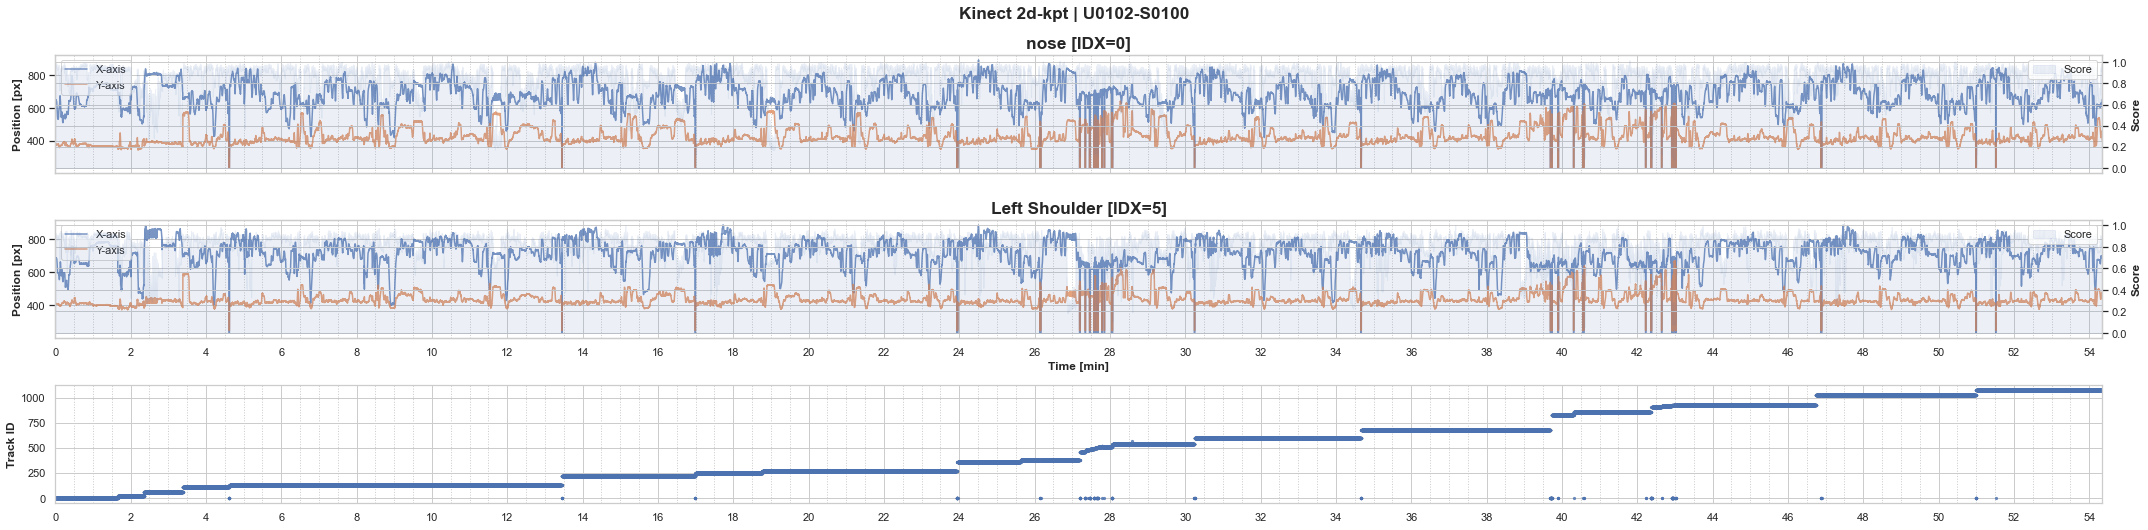

In [35]:
fig = plot_kinect_2d_kpt(data["annotations"], cfg)

### Tips: Directly Load Keypoints Sequence

JSON file (MS COCO format) contains a lot of information but they are not necessary for activity recognition.
You can use `optk.load_kyepoints()` to get keypoints sequence.
Skeleton with MS COCO format contains coordinates of 17 joints. There fore the shape of X is `(X/Y/Score, Time, JOINT)`.

In [36]:
path = Path(
    cfg.dataset.stream.path.dir,
    cfg.dataset.stream.path.fname,
)
print(path)

T, X = optk.data.load_keypoints(path)
print(f"Timetamp [unixtime]: T={T.shape}")
print(f"Keypoints          : X={X.shape}")

data/datasets/openpack/v0.2.0/U0102/kinect/2d-kpt/mmpose-hrnet-w48-posetrack18-384x288-posewarper-stage2/single/S0100.json
Timetamp [unixtime]: T=(48910,)
Keypoints          : X=(3, 48910, 17)


## Thank you for doing this tutorial!

Nest step is to build your models to predict work activities!
Please check [this repo (opnepack-torch)](https://github.com/open-pack/openpack-torch)!
I hope you will get good results in the competition!